In [2]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

train=pd.read_csv("train.csv")
test=pd.read_csv("test(1).csv")


In [9]:
test

,Id,cap.shape,cap.color,stalk.color.above.ring,stalk.color.below.ring,bruises,population
0,5165,f,w,w,w,True,v
1,4281,f,g,n,p,False,v
2,231,x,n,w,p,True,v
3,3890,f,n,w,w,False,s
4,1521,x,y,n,p,False,v
...,...,...,...,...,...,...,...
1620,983,x,n,w,y,False,v
1621,7055,x,e,p,g,True,v
1622,7456,x,y,b,n,False,y
1623,5132,x,w,w,w,True,n


In [10]:
train

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population,Id,poisonous
0,k,e,False,w,w,v,6573,1
1,f,e,True,p,w,y,4426,0
2,b,w,False,w,w,s,7018,0
3,k,g,False,w,w,n,5789,0
4,f,n,True,p,g,v,6187,0
...,...,...,...,...,...,...,...,...
6494,f,g,False,b,b,v,7002,1
6495,k,e,False,p,p,v,7323,1
6496,f,g,False,n,b,y,6206,1
6497,f,n,True,w,w,s,4658,0


In [ ]:
train

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population,Id,poisonous
0,k,e,False,w,w,v,6573,1
1,f,e,True,p,w,y,4426,0
2,b,w,False,w,w,s,7018,0
3,k,g,False,w,w,n,5789,0
4,f,n,True,p,g,v,6187,0
...,...,...,...,...,...,...,...,...
6494,f,g,False,b,b,v,7002,1
6495,k,e,False,p,p,v,7323,1
6496,f,g,False,n,b,y,6206,1
6497,f,n,True,w,w,s,4658,0


In [4]:
train.duplicated().sum()

0

/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 280 is smaller than n_iter=672. Running 280 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 280 candidates, totalling 1400 fits
{'preprocessor__num__simpleimputer__strategy': 'mean', 'model__splitter': 'random', 'model__min_samples_leaf': 3, 'model__max_depth': 11, 'model__criterion': 'gini'}
Fitting 5 folds for each of 280 candidates, totalling 1400 fits
{'model__criterion': 'gini', 'model__max_depth': 11, 'model__min_samples_leaf': 3, 'model__splitter': 'random', 'preprocessor__num__simpleimputer__strategy': 'mean'}
The training data prediction is 95.73% accurate tree
The test data prediction is 95.77% accurate tree
The training data prediction is 92.89% precision tree
The test data prediction is 93.09% precision tree
The training data Recall Score is 98.77% recall tree


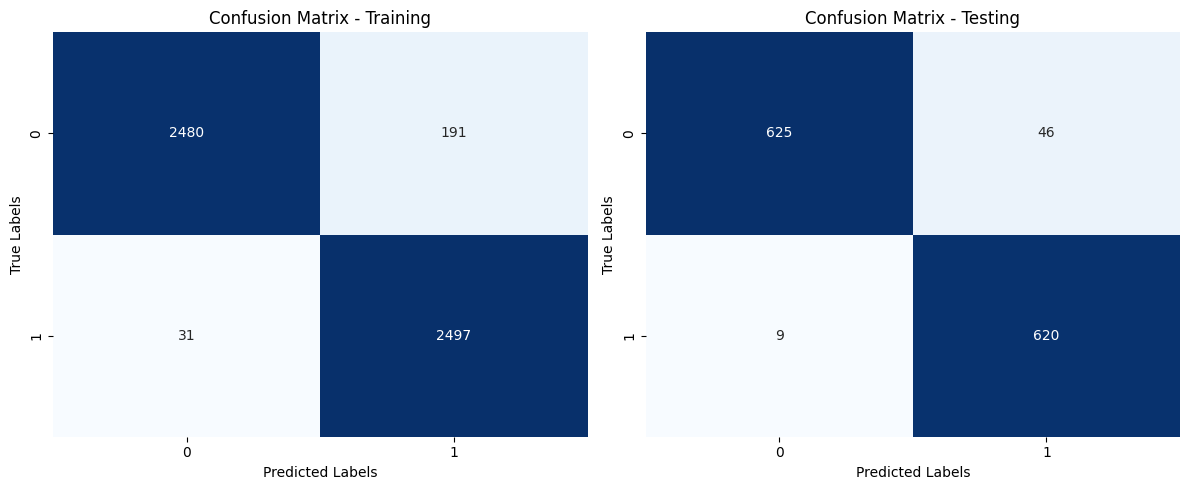

In [5]:
train_mod=train.copy()
train_mod
X=train_mod.drop("poisonous", axis=1)
y=train_mod.pop("poisonous")
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=123)

x_num_columns=X.select_dtypes(include="number").copy().columns
x_cat_columns=X.select_dtypes(exclude="number").copy().columns

num_pipeline=make_pipeline(
    SimpleImputer(strategy="mean"), 
    StandardScaler()
)
cat_pipeline=make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(sparse_output=False, handle_unknown="ignore")
)
preprocessor=ColumnTransformer(
    transformers=[
        ("num", num_pipeline, x_num_columns), 
        ("cat", cat_pipeline, x_cat_columns)
    ])

full_pipeline=Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("model", DecisionTreeClassifier(random_state=123))
    ]).set_output(transform="pandas")


full_pipeline.fit(X_train, y_train)
full_pipeline.predict(X_test)

param_grid = {
   "preprocessor__num__simpleimputer__strategy": ["mean", "median"],
    "model__max_depth": range(8, 13),
    "model__min_samples_leaf": range(3, 10),
    "model__criterion": ["gini", "entropy"],
    "model__splitter": ["best", "random"]
}
random_search = RandomizedSearchCV(
    full_pipeline,
    param_distributions=param_grid,
    n_iter=672,  # Number of random combinations to try
    cv=5,
    verbose=1,
    error_score='raise',
    random_state=123 
)
random_search.fit(X_train, y_train)
print(random_search.best_params_)
random_search.best_estimator_

search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1, 
                      error_score='raise')
search.fit(X_train, y_train)
print(search.best_params_)

y_train_pred = search.predict(X_train)
y_test_pred = search.predict(X_test)
train_accuracy_tree = accuracy_score(y_train, y_train_pred)
train_accuracy_rounded_tree = round(train_accuracy_tree, 4)

print("The training data prediction is {:.2%} accurate tree".format(train_accuracy_rounded_tree))#Testing Accuracy
test_accuracy_tree = accuracy_score(y_test, y_test_pred)
test_accuracy_rounded_tree = round(test_accuracy_tree, 4)

print("The test data prediction is {:.2%} accurate tree".format(test_accuracy_rounded_tree))
# Training Precision Score
train_precision_tree = precision_score(y_train, y_train_pred) 
train_precision_rounded_tree = round(train_precision_tree, 4)

print("The training data prediction is {:.2%} precision tree".format(train_precision_rounded_tree))
#Testing Precision Score 
test_precision_tree = precision_score(y_test, y_test_pred) 
test_precision_rounded_tree = round(test_precision_tree, 4)

print("The test data prediction is {:.2%} precision tree".format(test_precision_rounded_tree))
# Training Recall Score
train_recall_tree = recall_score(y_train, y_train_pred) 
train_recall_rounded_tree = round(train_recall_tree , 4)

print("The training data Recall Score is {:.2%} recall tree".format(train_recall_rounded_tree))
# Testing Recall Score
test_recall_tree = recall_score(y_test, y_test_pred) 
test_recall_rounded_tree = round(test_recall_tree, 4)

conf_matrix_train_tree = confusion_matrix(y_train, y_train_pred)
conf_matrix_test_tree = confusion_matrix(y_test, y_test_pred)


# Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Create a matrix Tree 
sns.heatmap(conf_matrix_train_tree, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix - Training')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

sns.heatmap(conf_matrix_test_tree, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Confusion Matrix - Testing')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Plot Settings
plt.tight_layout()
plt.show()

In [6]:
conf_matrix_test_tree

array([[625,  46],
       [  9, 620]])

# RandomForest Classifier 

/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 432 is smaller than n_iter=672. Running 432 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
{'preprocessor__num__simpleimputer__strategy': 'mean', 'model__n_estimators': 100, 'model__min_samples_split': 10, 'model__min_samples_leaf': 1, 'model__max_depth': None, 'model__bootstrap': True}
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
{'model__bootstrap': True, 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 100, 'preprocessor__num__simpleimputer__strategy': 'mean'}
The training data prediction is 97.83% accurate tree
The test data prediction is 96.38% accurate tree
The training data prediction is 97.26% precision tree
The test data prediction is 95.61% precision tree
The training data Recall Score is 98.30% recall tree


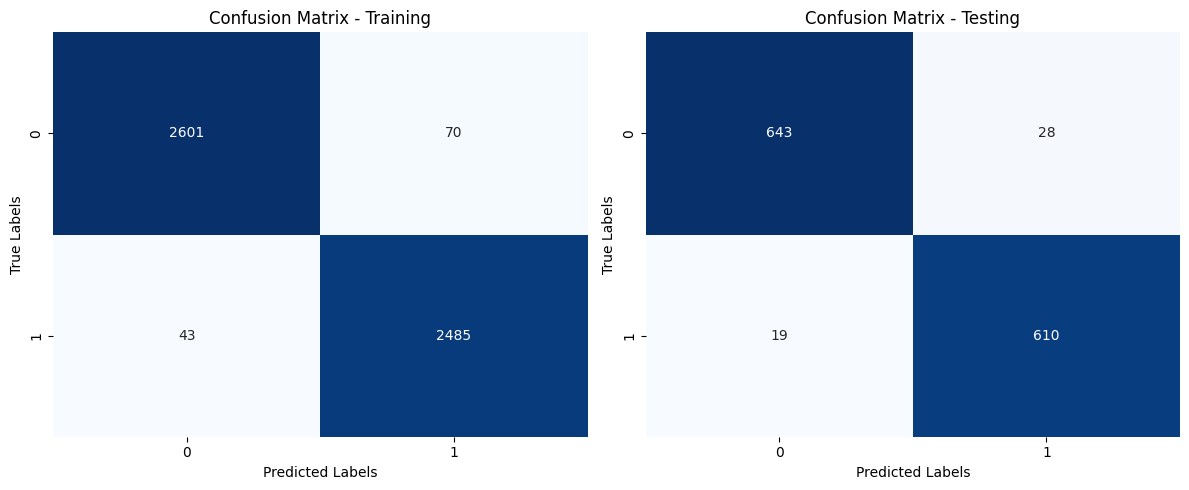

In [7]:
train_mod=train.copy()
train_mod
X=train_mod.drop("poisonous", axis=1)
y=train_mod.pop("poisonous")
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=123)

x_num_columns=X.select_dtypes(include="number").copy().columns
x_cat_columns=X.select_dtypes(exclude="number").copy().columns

num_pipeline=make_pipeline(
    SimpleImputer(strategy="mean"), 
    StandardScaler()
)
cat_pipeline=make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(sparse_output=False, handle_unknown="ignore")
)
preprocessor=ColumnTransformer(
    transformers=[
        ("num", num_pipeline, x_num_columns), 
        ("cat", cat_pipeline, x_cat_columns)
    ])

full_pipeline=Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("model", RandomForestClassifier(random_state=123))
    ]).set_output(transform="pandas")


full_pipeline.fit(X_train, y_train)
full_pipeline.predict(X_test)

param_grid = {
    "preprocessor__num__simpleimputer__strategy": ["mean", "median"],
    "model__n_estimators": [50, 100, 150],  # Number of trees in the forest
    "model__max_depth": [None, 10, 20, 30],  # Maximum depth of the trees
    "model__min_samples_split": [2, 5, 10],  # Minimum samples required to split a node
    "model__min_samples_leaf": [1, 2, 4],  # Minimum samples required at each leaf node
    "model__bootstrap": [True, False],  # Whether bootstrap samples are used when building trees
}


random_search = RandomizedSearchCV(
    full_pipeline,
    param_distributions=param_grid,
    n_iter=672,  # Number of random combinations to try
    cv=5,
    verbose=1,
    error_score='raise',
    random_state=123 
)
random_search.fit(X_train, y_train)
print(random_search.best_params_)
random_search.best_estimator_

search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1, 
                      error_score='raise')
search.fit(X_train, y_train)
print(search.best_params_)

y_train_pred = search.predict(X_train)
y_test_pred = search.predict(X_test)
train_accuracy_tree = accuracy_score(y_train, y_train_pred)
train_accuracy_rounded_tree = round(train_accuracy_tree, 4)

print("The training data prediction is {:.2%} accurate tree".format(train_accuracy_rounded_tree))#Testing Accuracy
test_accuracy_tree = accuracy_score(y_test, y_test_pred)
test_accuracy_rounded_tree = round(test_accuracy_tree, 4)

print("The test data prediction is {:.2%} accurate tree".format(test_accuracy_rounded_tree))
# Training Precision Score
train_precision_tree = precision_score(y_train, y_train_pred) 
train_precision_rounded_tree = round(train_precision_tree, 4)

print("The training data prediction is {:.2%} precision tree".format(train_precision_rounded_tree))
#Testing Precision Score 
test_precision_tree = precision_score(y_test, y_test_pred) 
test_precision_rounded_tree = round(test_precision_tree, 4)

print("The test data prediction is {:.2%} precision tree".format(test_precision_rounded_tree))
# Training Recall Score
train_recall_tree = recall_score(y_train, y_train_pred) 
train_recall_rounded_tree = round(train_recall_tree , 4)

print("The training data Recall Score is {:.2%} recall tree".format(train_recall_rounded_tree))
# Testing Recall Score
test_recall_tree = recall_score(y_test, y_test_pred) 
test_recall_rounded_tree = round(test_recall_tree, 4)

conf_matrix_train_tree = confusion_matrix(y_train, y_train_pred)
conf_matrix_test_tree = confusion_matrix(y_test, y_test_pred)


# Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Matrix
sns.heatmap(conf_matrix_train_tree, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix - Training')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# 
sns.heatmap(conf_matrix_test_tree, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Confusion Matrix - Testing')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Layout Settings
plt.tight_layout()
plt.show()

In [40]:
conf_matrix_test_tree

array([[643,  28],
       [ 19, 610]])

# Fitting Decision Tree Classifier into our test set

/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 280 is smaller than n_iter=672. Running 280 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 280 candidates, totalling 1400 fits
{'preprocessor__num__simpleimputer__strategy': 'mean', 'model__splitter': 'random', 'model__min_samples_leaf': 3, 'model__max_depth': 11, 'model__criterion': 'gini'}
Fitting 5 folds for each of 280 candidates, totalling 1400 fits
{'model__criterion': 'gini', 'model__max_depth': 11, 'model__min_samples_leaf': 3, 'model__splitter': 'random', 'preprocessor__num__simpleimputer__strategy': 'mean'}
The training data prediction is 95.73% accurate tree
The test data prediction is 95.77% accurate tree
The training data prediction is 92.89% precision tree
The test data prediction is 93.09% precision tree
The training data Recall Score is 98.77% recall tree


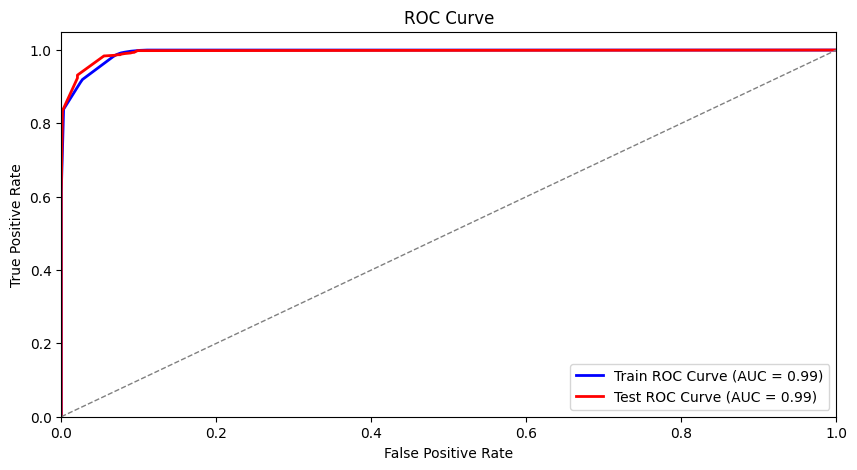

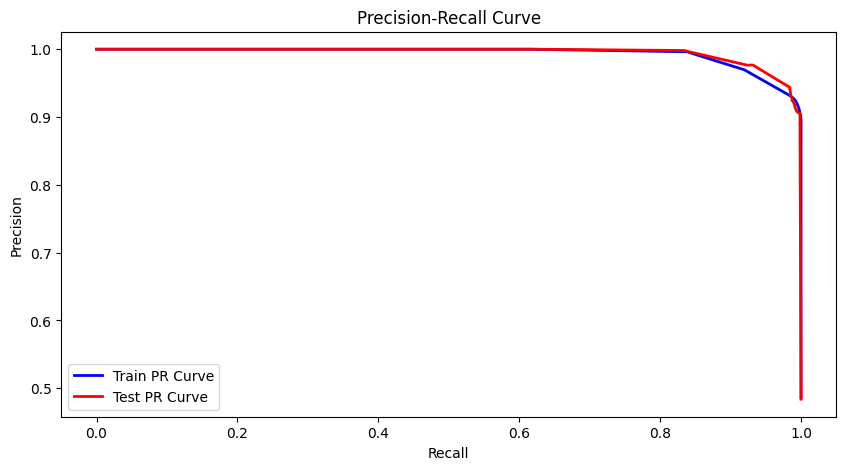

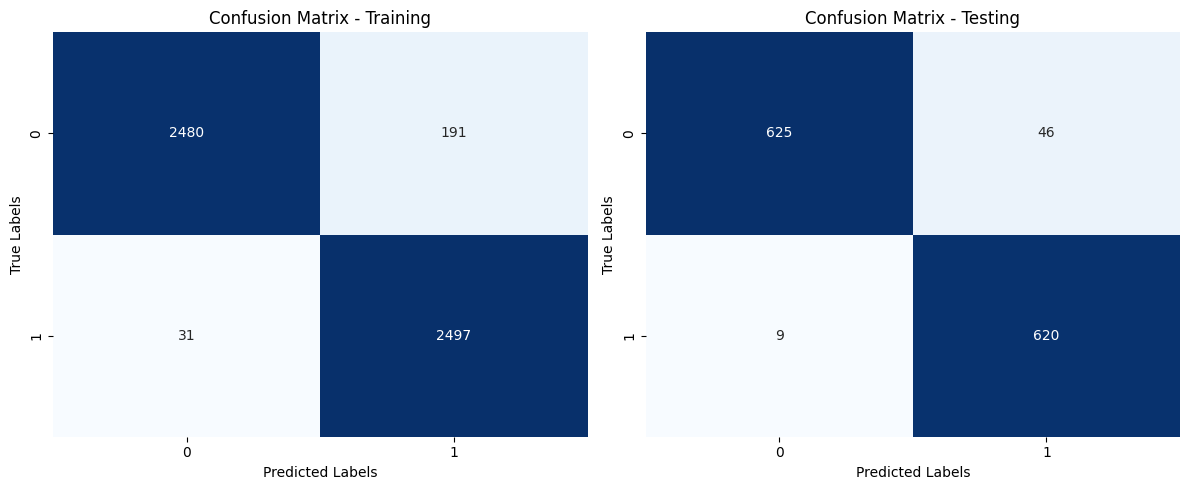

In [8]:
train_mod=train.copy()
train_mod
X=train_mod.drop("poisonous", axis=1)
y=train_mod.pop("poisonous")
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=123)

x_num_columns=X.select_dtypes(include="number").copy().columns
x_cat_columns=X.select_dtypes(exclude="number").copy().columns

num_pipeline=make_pipeline(
    SimpleImputer(strategy="mean"), 
    StandardScaler()
)
cat_pipeline=make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(sparse_output=False, handle_unknown="ignore")
)
preprocessor=ColumnTransformer(
    transformers=[
        ("num", num_pipeline, x_num_columns), 
        ("cat", cat_pipeline, x_cat_columns)
    ])

full_pipeline=Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("model", DecisionTreeClassifier(random_state=123))
    ]).set_output(transform="pandas")


full_pipeline.fit(X_train, y_train)
full_pipeline.predict_proba(X_test)

param_grid = {
   "preprocessor__num__simpleimputer__strategy": ["mean", "median"],
    "model__max_depth": range(8, 13),
    "model__min_samples_leaf": range(3, 10),
    "model__criterion": ["gini", "entropy"],
    "model__splitter": ["best", "random"]
}
random_search = RandomizedSearchCV(
    full_pipeline,
    param_distributions=param_grid,
    n_iter=672,  # Number of random combinations to try
    cv=5,
    verbose=1,
    error_score='raise',
    random_state=123 
)
random_search.fit(X_train, y_train)
print(random_search.best_params_)
random_search.best_estimator_

search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1, 
                      error_score='raise')
search.fit(X_train, y_train)
print(search.best_params_)

y_train_pred = search.predict(X_train)
y_test_pred = search.predict(X_test)
train_accuracy_tree = accuracy_score(y_train, y_train_pred)
train_accuracy_rounded_tree = round(train_accuracy_tree, 4)

y_train_probs = search.predict_proba(X_train)[:, 1]
y_test_probs = search.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)

# AUC score for ROC curve
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Precision-Recall curve
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_probs)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_probs)



print("The training data prediction is {:.2%} accurate tree".format(train_accuracy_rounded_tree))#Testing Accuracy
test_accuracy_tree = accuracy_score(y_test, y_test_pred)
test_accuracy_rounded_tree = round(test_accuracy_tree, 4)

print("The test data prediction is {:.2%} accurate tree".format(test_accuracy_rounded_tree))
# Training Precision Score
train_precision_tree = precision_score(y_train, y_train_pred) 
train_precision_rounded_tree = round(train_precision_tree, 4)

print("The training data prediction is {:.2%} precision tree".format(train_precision_rounded_tree))
#Testing Precision Score 
test_precision_tree = precision_score(y_test, y_test_pred) 
test_precision_rounded_tree = round(test_precision_tree, 4)

print("The test data prediction is {:.2%} precision tree".format(test_precision_rounded_tree))
# Training Recall Score
train_recall_tree = recall_score(y_train, y_train_pred) 
train_recall_rounded_tree = round(train_recall_tree , 4)

print("The training data Recall Score is {:.2%} recall tree".format(train_recall_rounded_tree))
# Testing Recall Score
test_recall_tree = recall_score(y_test, y_test_pred) 
test_recall_rounded_tree = round(test_recall_tree, 4)

conf_matrix_train_tree = confusion_matrix(y_train, y_train_pred)
conf_matrix_test_tree = confusion_matrix(y_test, y_test_pred)

# Plotting ROC Curves
plt.figure(figsize=(10, 5))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC Curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Plotting Precision-Recall Curves
plt.figure(figsize=(10, 5))
plt.plot(recall_train, precision_train, color='blue', lw=2, label='Train PR Curve')
plt.plot(recall_test, precision_test, color='red', lw=2, label='Test PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.show()


# Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Matriz de Confusão - Treino
sns.heatmap(conf_matrix_train_tree, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix - Training')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Confusion matrix
sns.heatmap(conf_matrix_test_tree, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Confusion Matrix - Testing')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Layout Settings
plt.tight_layout()
plt.show()

Fit the best params into test

In [52]:
test_prediction=full_pipeline.predict(test)
submission=pd.DataFrame({
    "Id": test["Id"],
    "poisonous": test_prediction
})

submission.to_csv("my_first.csv", index=False)

In [49]:
test

,Id,cap.shape,cap.color,stalk.color.above.ring,stalk.color.below.ring,bruises,population
0,5165,f,w,w,w,True,v
1,4281,f,g,n,p,False,v
2,231,x,n,w,p,True,v
3,3890,f,n,w,w,False,s
4,1521,x,y,n,p,False,v
...,...,...,...,...,...,...,...
1620,983,x,n,w,y,False,v
1621,7055,x,e,p,g,True,v
1622,7456,x,y,b,n,False,y
1623,5132,x,w,w,w,True,n
